<a href="https://colab.research.google.com/github/ABHAY1937/MACHINE-LEARNING-PROJECTS/blob/main/Student_performance_in_Exams_Regression_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

Import datas and required packages

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV data into pandas dataframe

In [333]:
df = pd.read_csv("/content/StudentsPerformance.csv")

In [334]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [335]:
df.shape

(1000, 8)

In [336]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [337]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

checking missing values

In [338]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

checking duplicate values

In [339]:
df.duplicated().sum()

0

check datatype

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking the number of unique values

In [341]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

check statistics of the data

In [342]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


exploring data


In [343]:
print('Categories in "gender" variable:      ',end=" ")
print(df["gender"].unique())

print("categories in 'race_ethnicity' variable:     ",end=" ")
print(df["race/ethnicity"].unique())

print("categories in 'parental level of education' variable:",end=' ')
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:       ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:",end=' ')
print(df["test preparation course"].unique())

Categories in "gender" variable:       ['female' 'male']
categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:        ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [344]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [345]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Adding columns for 'Total Score' and 'Average score'

In [346]:
df["Total score"] = df["math score"] + df["reading score"] + df['writing score']
df["Average score"] = df["Total score"]/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [347]:
reading_full = df[df['reading score'] == 100]['Average score'].count()
writing_full = df[df['writing score'] == 100]['Average score'].count()
math_full = df[df['math score'] == 100]['Average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'NUmber of students with full marks in reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
NUmber of students with full marks in reading: 17


In [348]:
reading_less_20 = df[df['reading score'] <= 20]['Average score'].count()
writing_less_20 = df[df['writing score'] <=20]["Average score"].count()
math_less_20 = df[df['math score'] <=20]["Average score"].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing : {writing_less_20}')
print(f'Number of students with less then 20 marisk in reading : {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in writing : 3
Number of students with less then 20 marisk in reading : 1


from the above values we get students have performed the worst in maths     

best performance in reading section


Exploring data(Visualization)

Visualize average score distrution to make some conclusion using a histogram and KDE(Kernel Distribution Function)

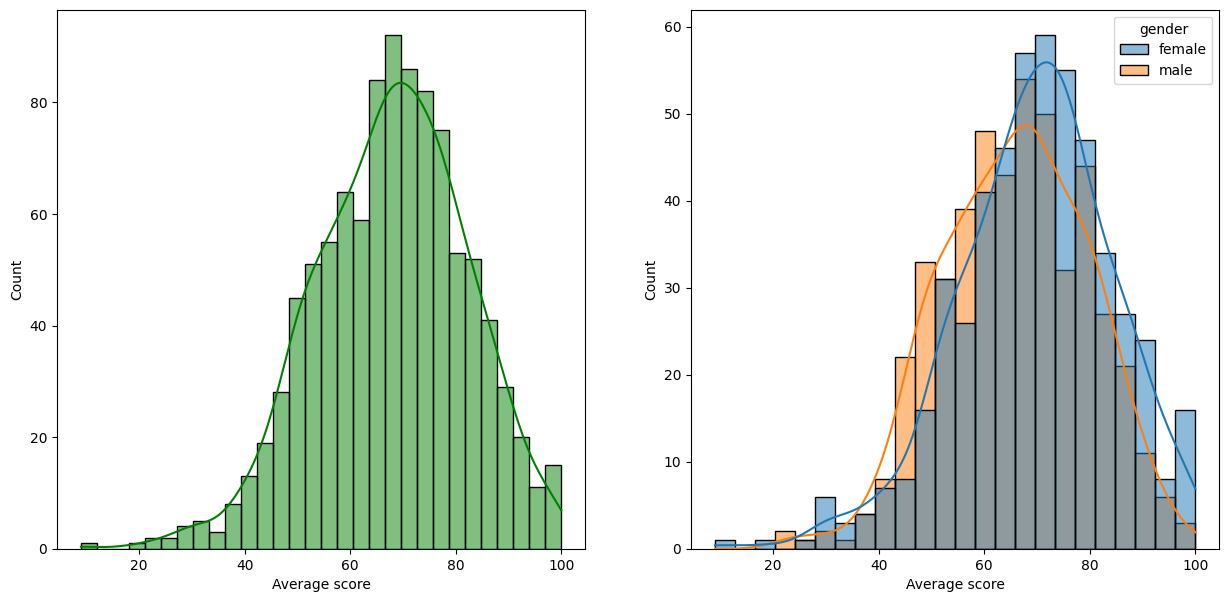

In [349]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average score',kde=True,hue='gender')
plt.show()

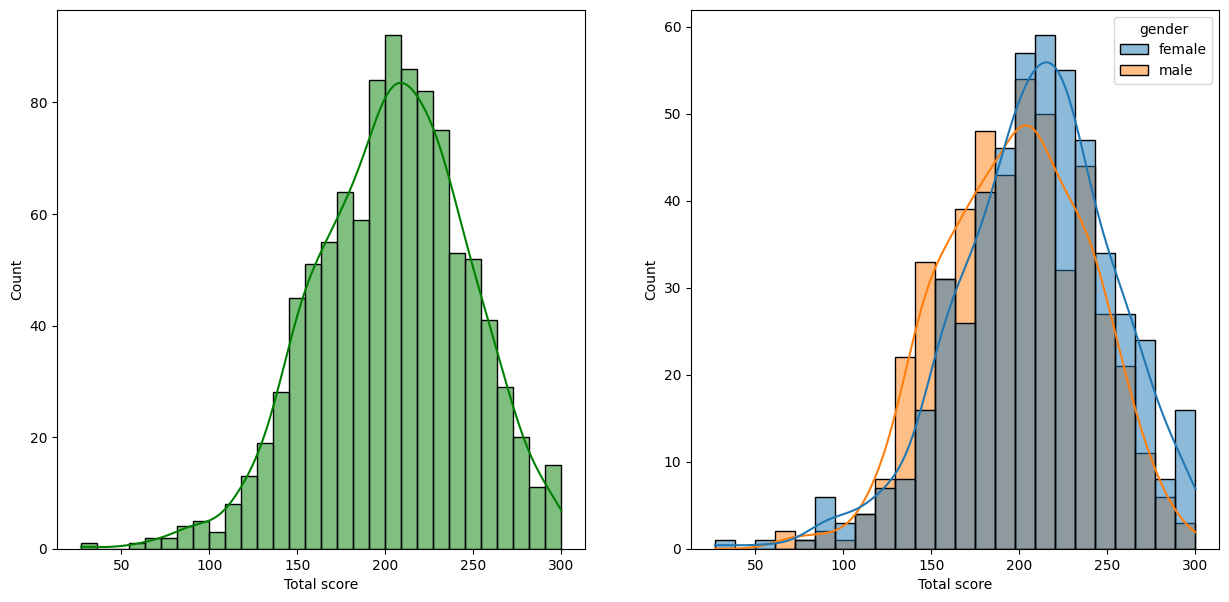

In [350]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total score',kde=True,hue='gender')
plt.show()


female students tend to perform well then male students

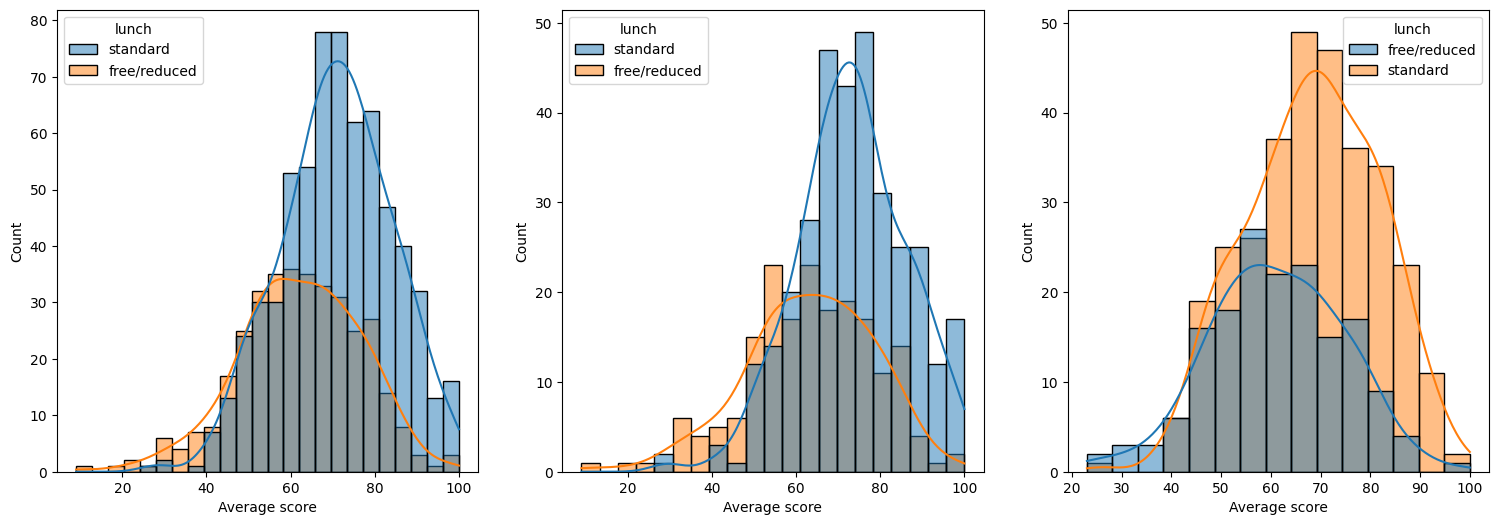

In [351]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='lunch')
plt.show()

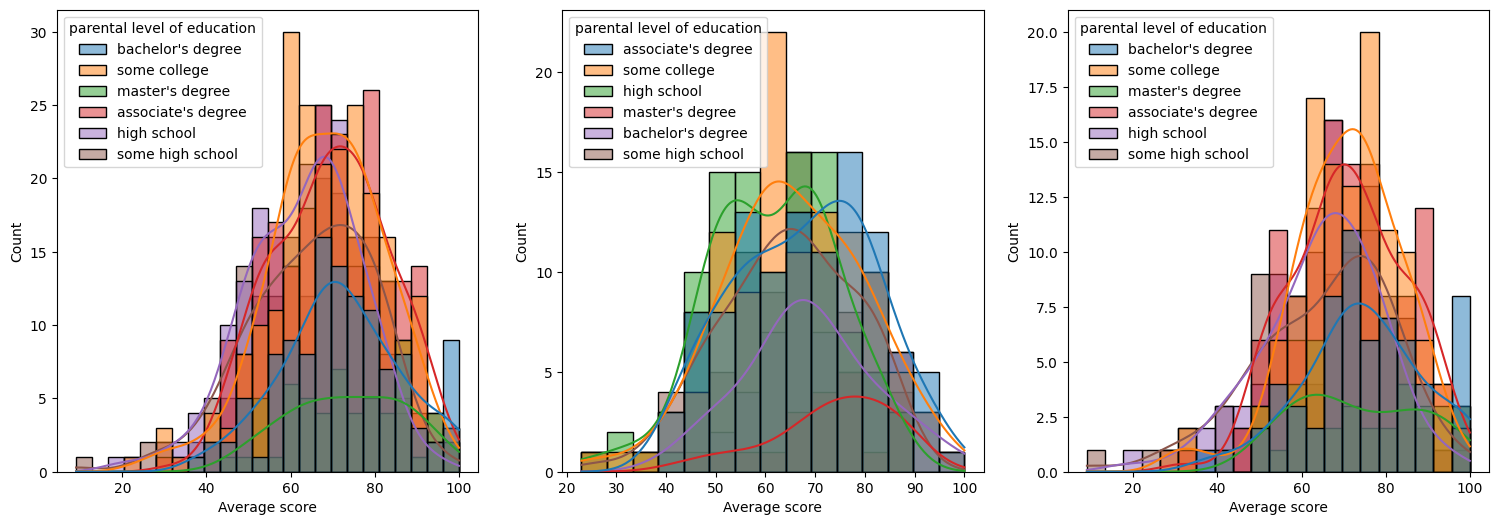

In [352]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='Average score',kde=True,hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x="Average score",kde=True,hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='parental level of education')
plt.show()

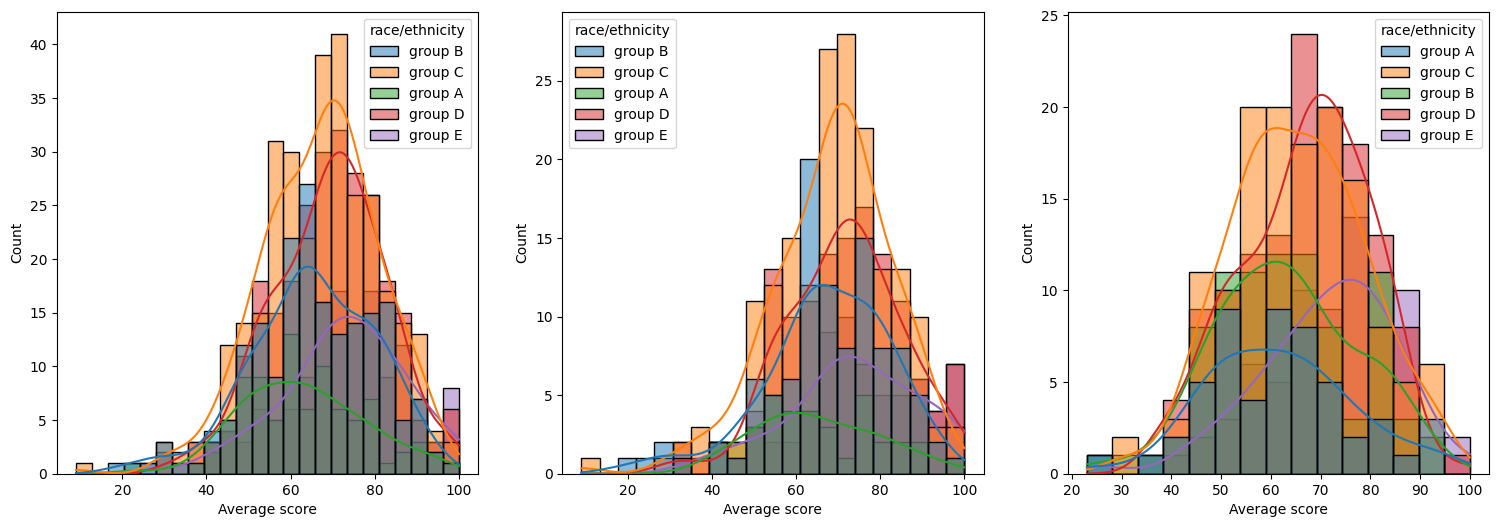

In [353]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x="Average score",kde=True,hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=="male"],x='Average score',kde=True,hue='race/ethnicity')
plt.show()

maximum score of students in all subjects

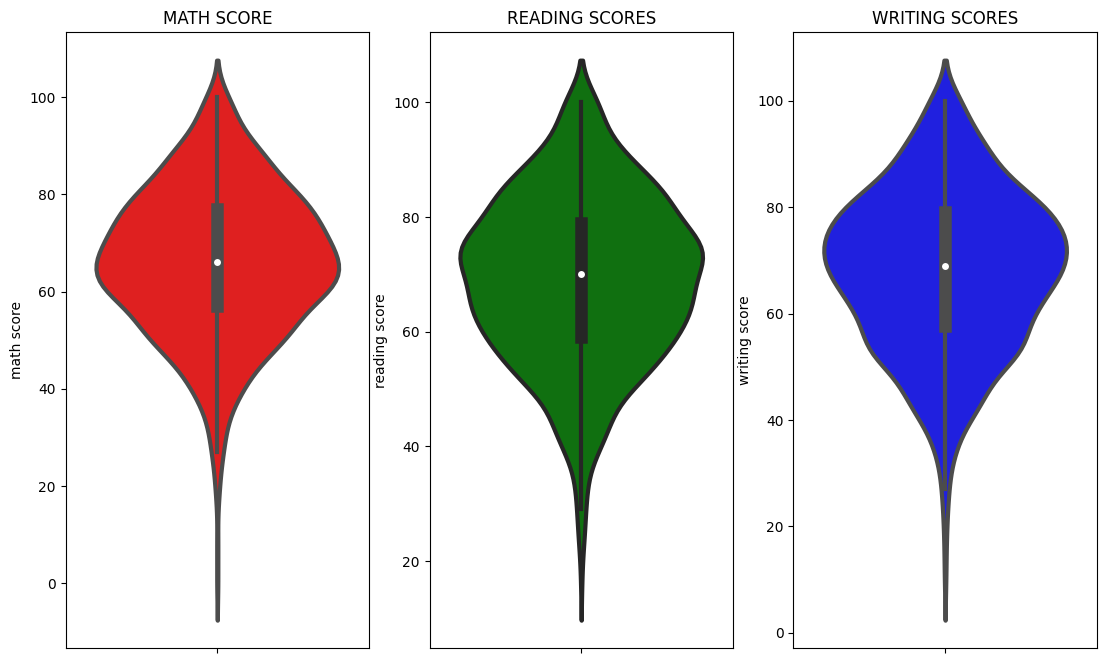

In [354]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORE")
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("READING SCORES")
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("WRITING SCORES")
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

from the 3 plots its clearly that most of the students score in between 60-80 in maths whereas in reading and writing of them score from 50-80

Multivariate analysis using pieplot

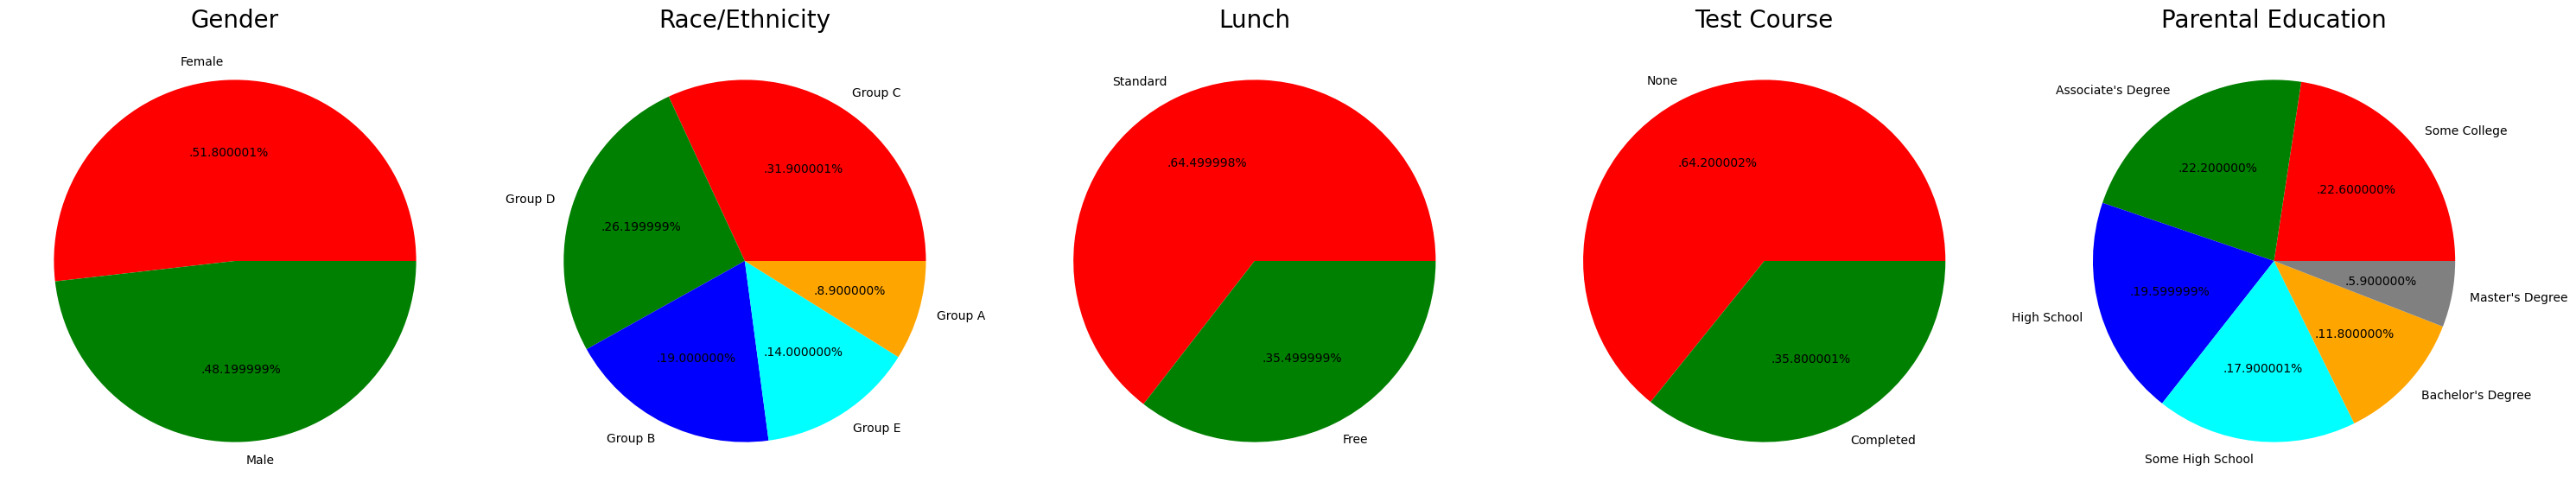

In [355]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Number of Male and Female students is almost equal
Number students are greatest in Group C
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College" is greater followed closely by "Associate's

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

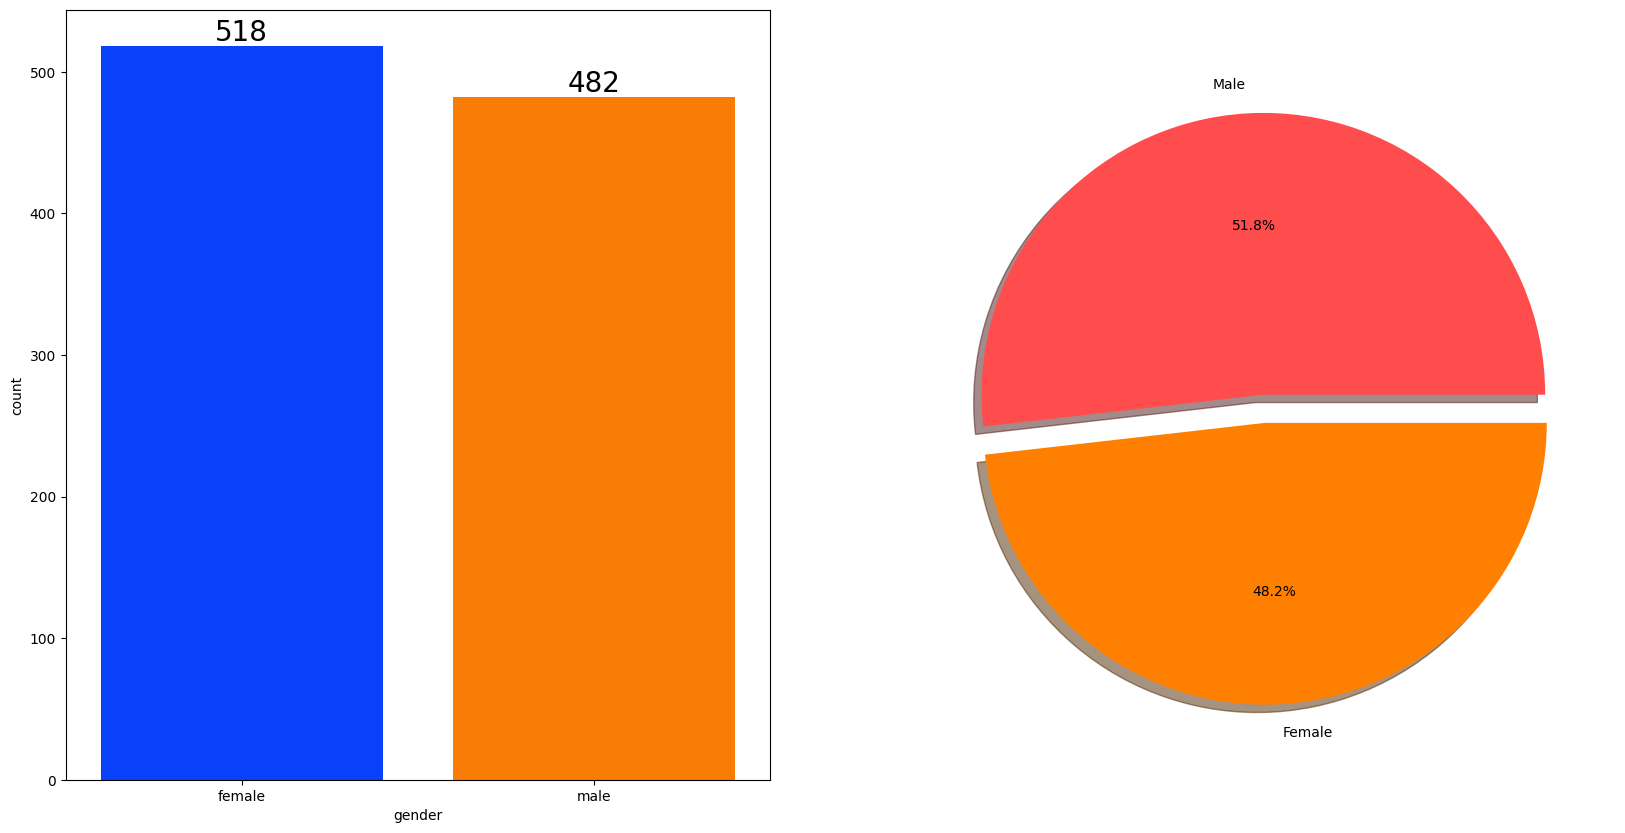

In [356]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [357]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,Total score,Average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


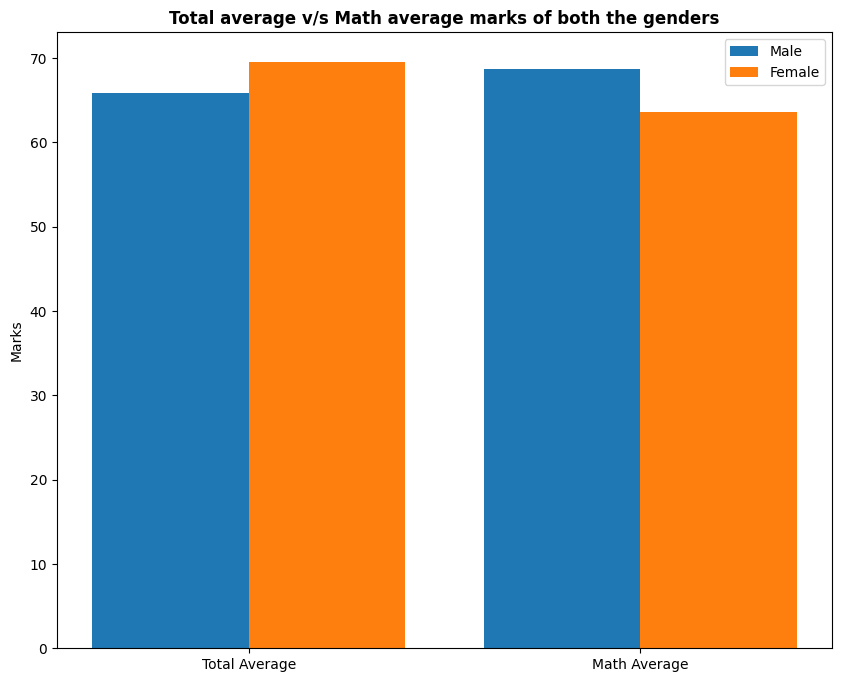

In [358]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

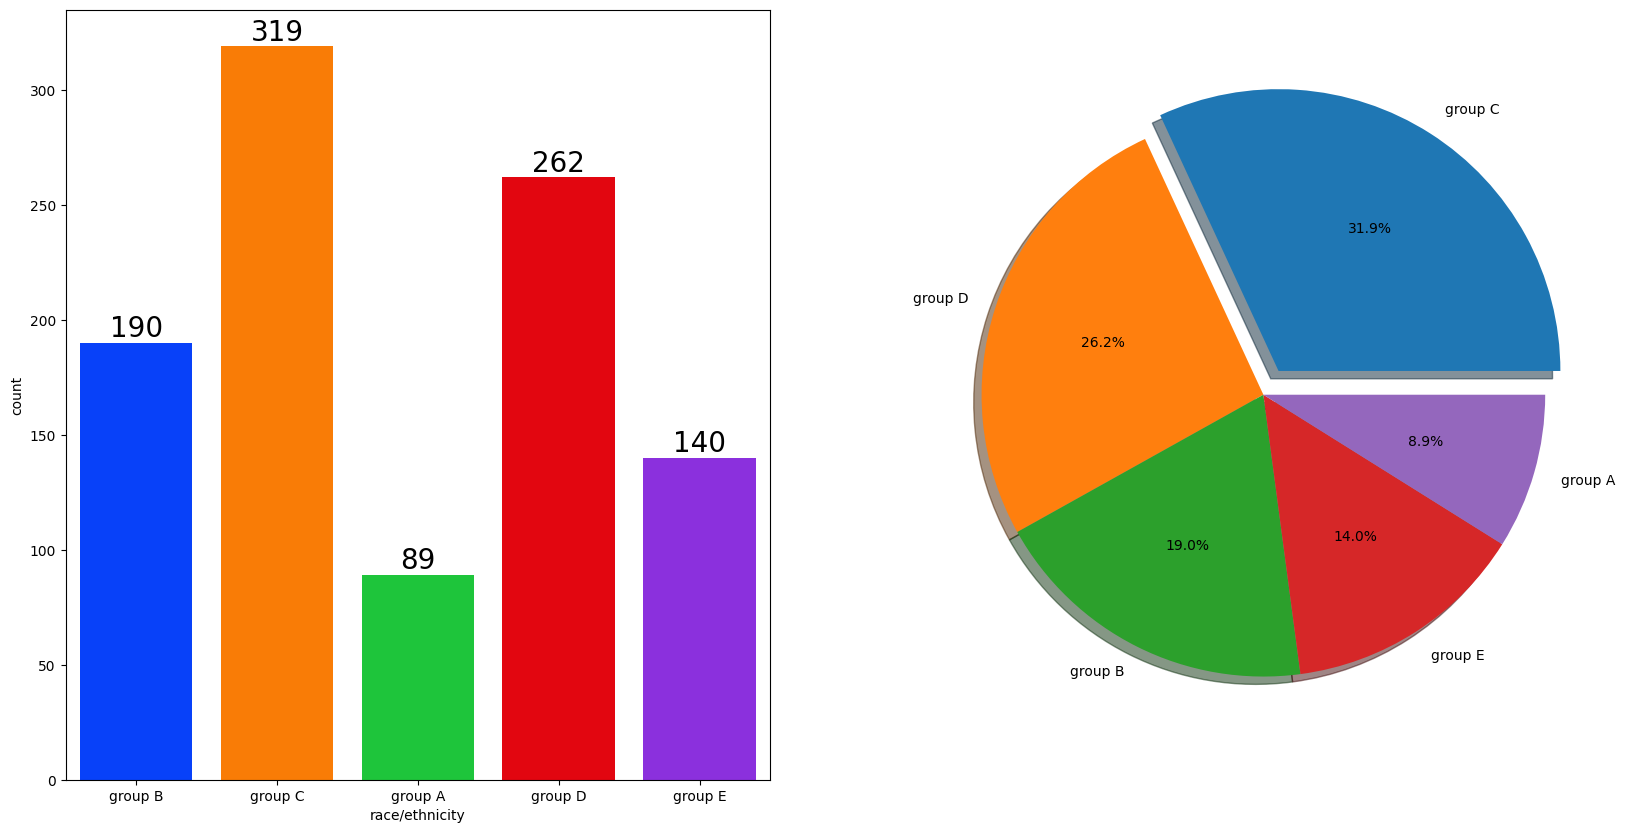

In [359]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

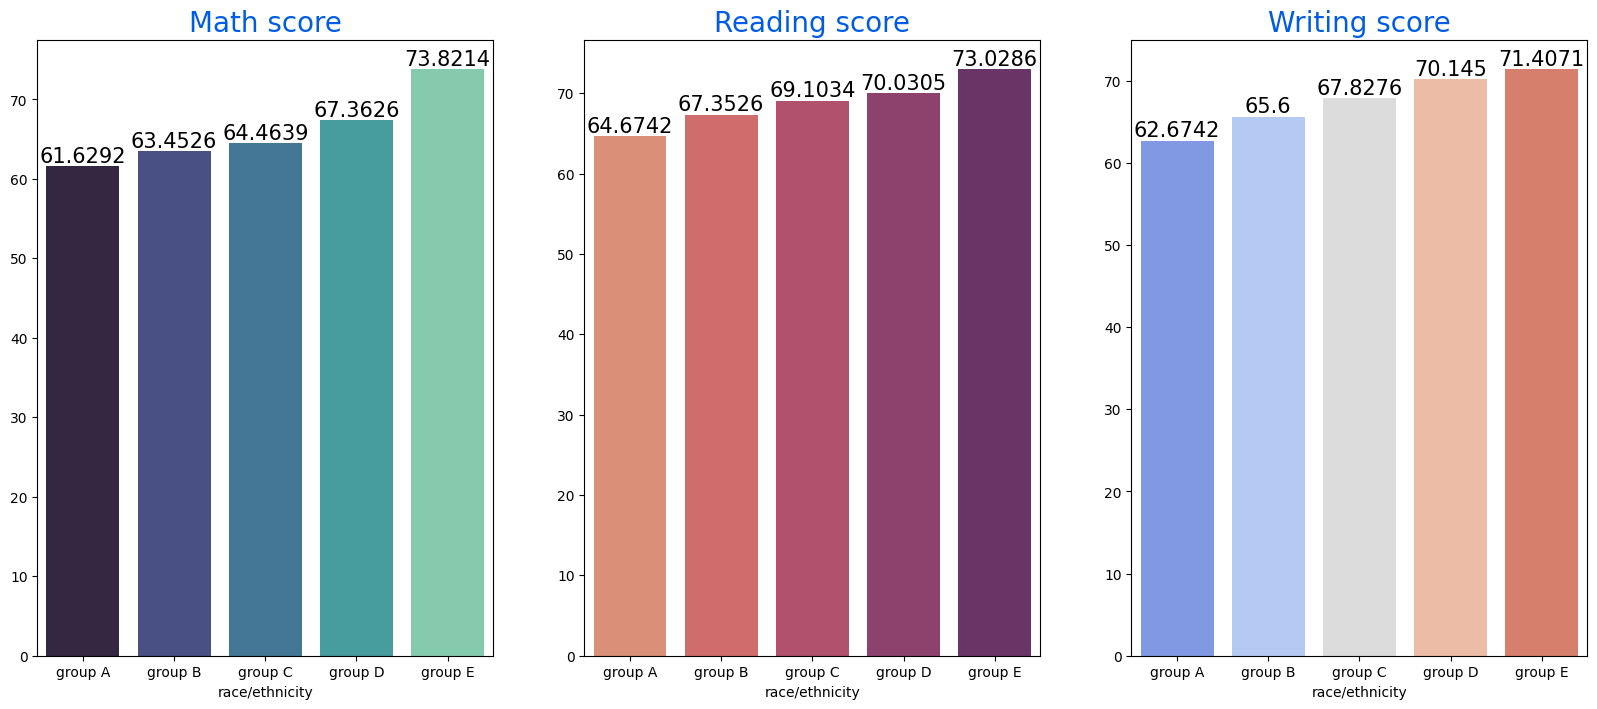

In [360]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

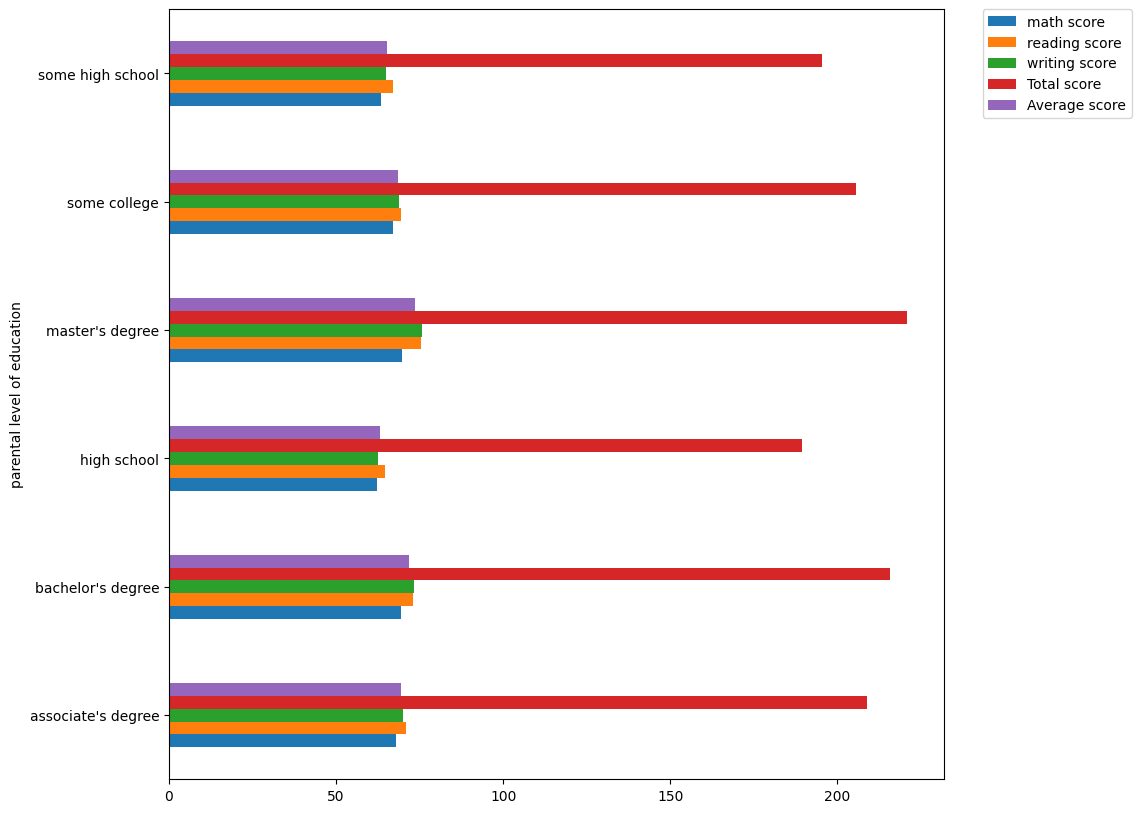

In [361]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

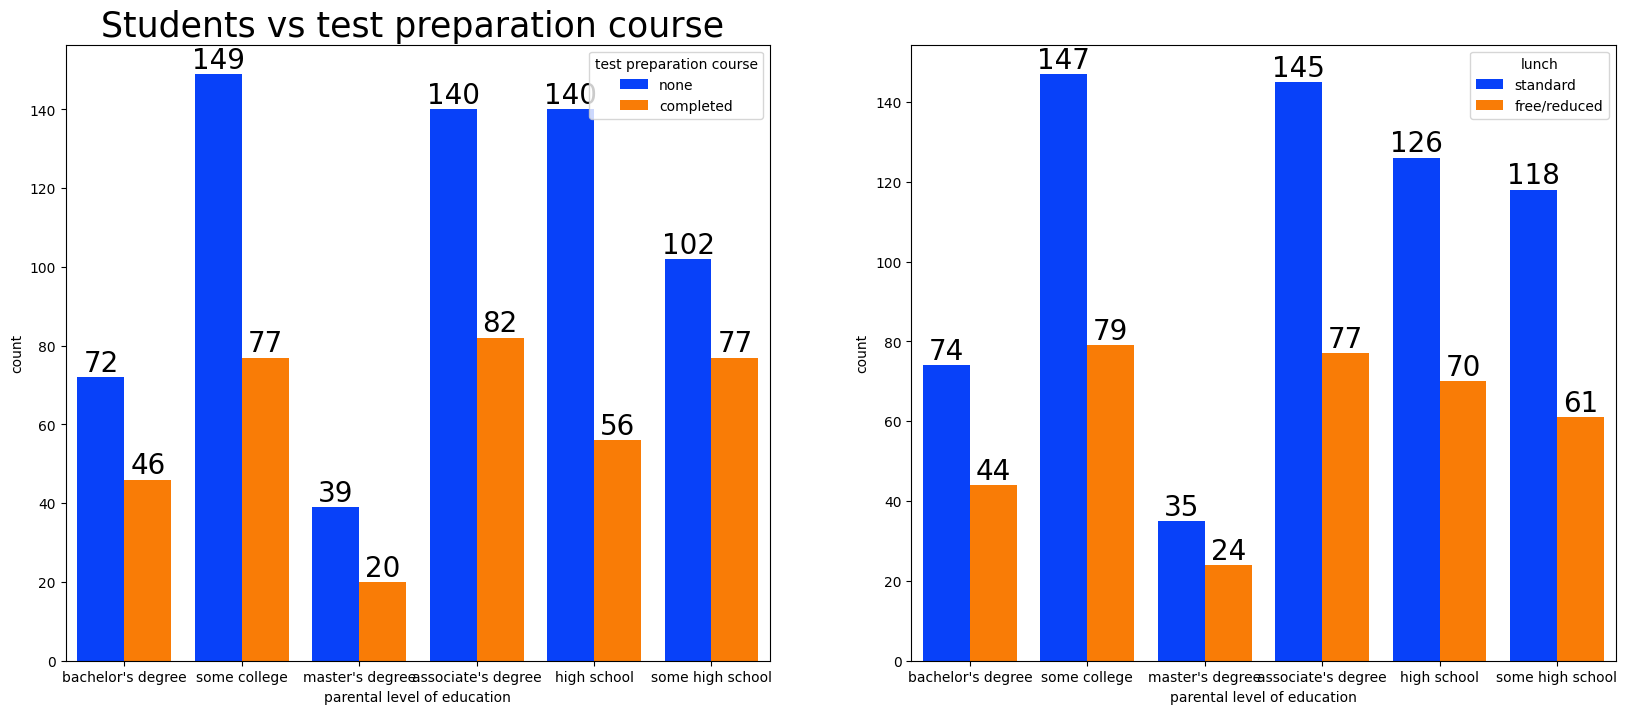

In [362]:
#BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<Axes: xlabel='lunch', ylabel='writing score'>

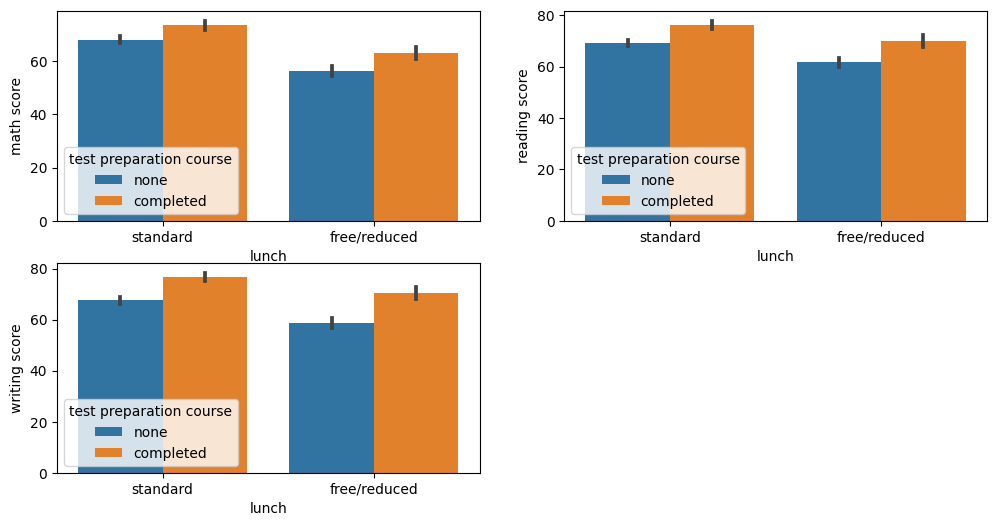

In [363]:
#BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

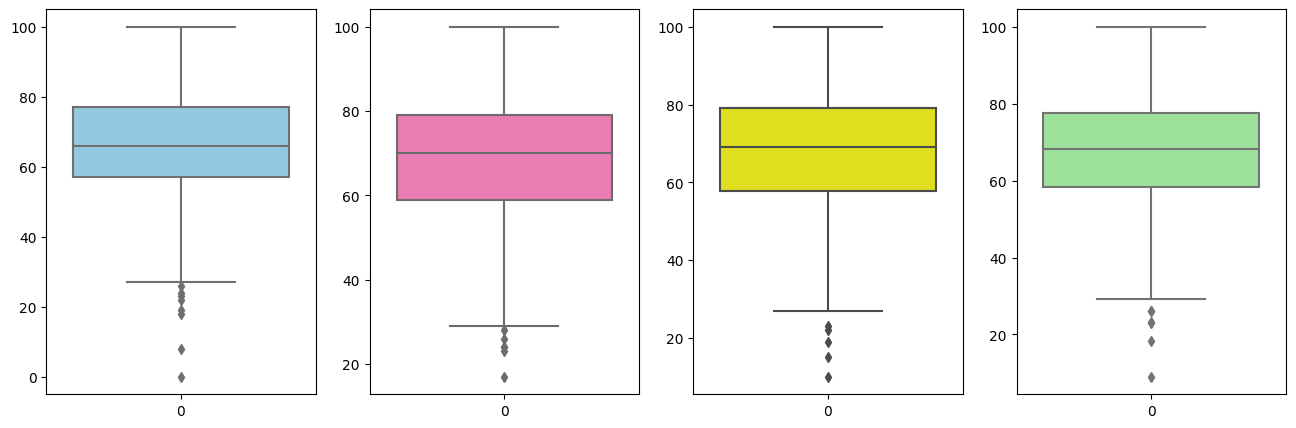

In [364]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average score'],color='lightgreen')
plt.show()

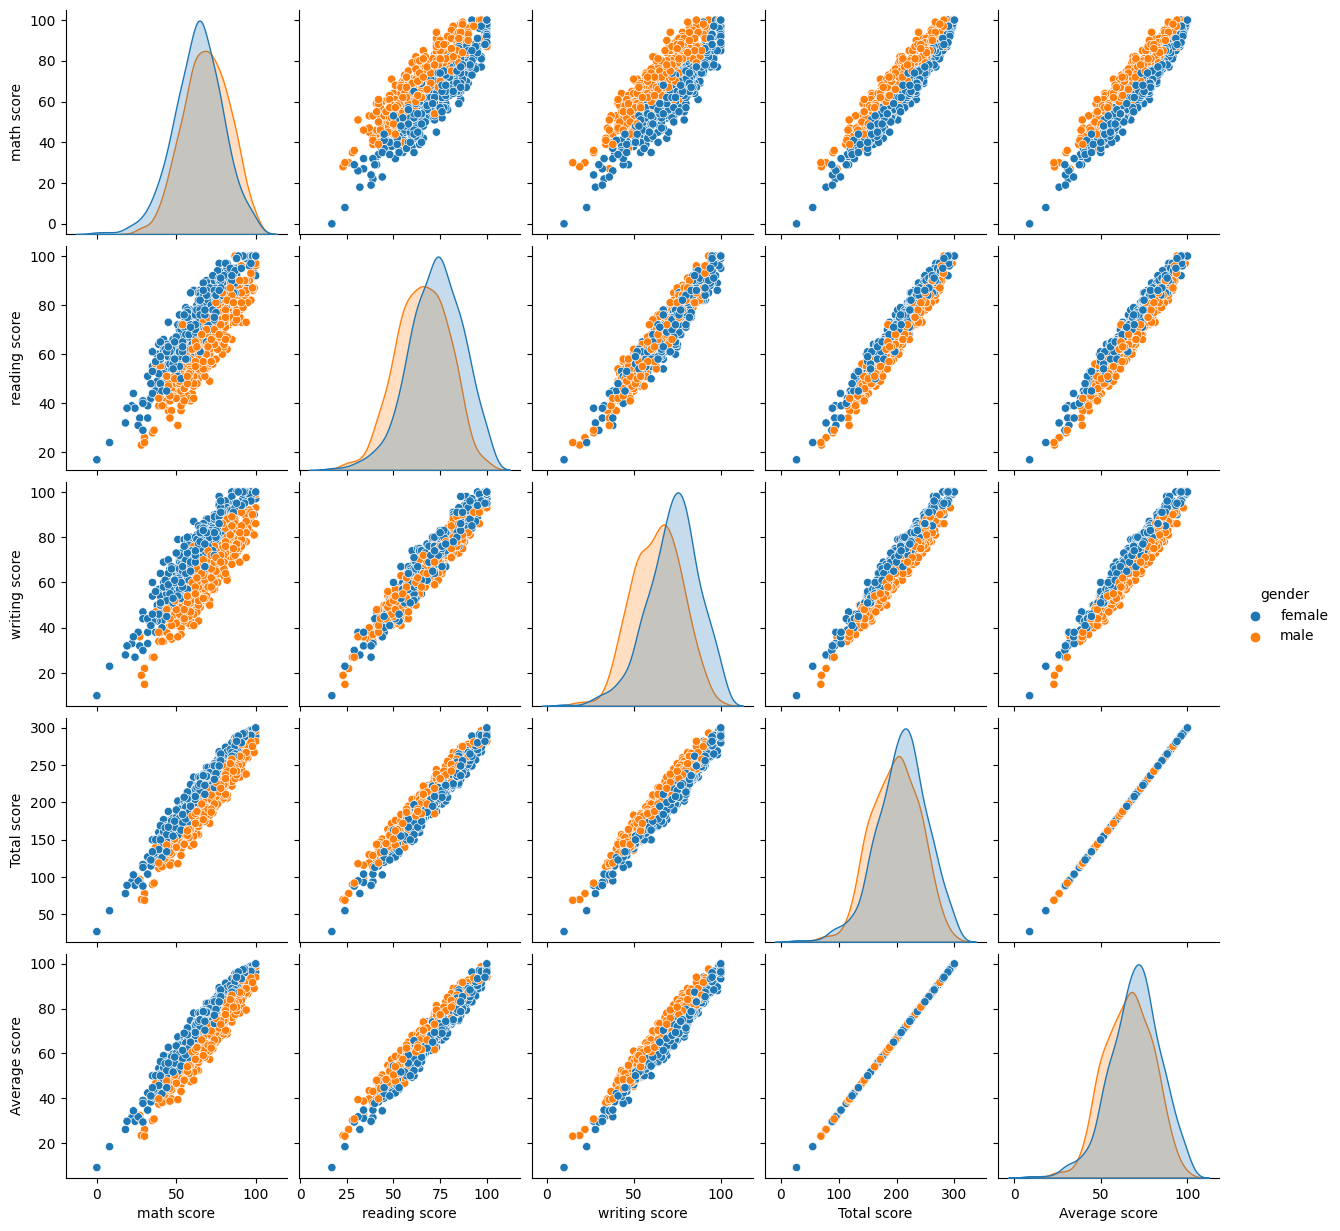

In [365]:
sns.pairplot(df,hue = 'gender')
plt.show()

Model Traning



In [366]:
!pip install catboost


In [367]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [368]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [369]:
#preparing x and y variables
x = df.drop(columns=['math score'],axis=1)

In [370]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [371]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [372]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [373]:
x = preprocessor.fit_transform(x)

In [374]:
x.shape

(1000, 21)

In [375]:
#seperate dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape, x_test.shape

((800, 21), (200, 21))

create an evaluating function to give all metrics after model traning


In [376]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  r2_square = r2_score(true, predicted)
  return mae, rmse, r2_square

In [377]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regeressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()
}
model_list = []
r2_list = []
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train,y_train) #train model

  #model prediction
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  #evaluate train and test dataset
  model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

  model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for training set')
  print('-Root mean squarred error: {:.4f}'.format(model_test_rmse))
  print('mean absolute error: {:.4f}'.format(model_test_mae))
  print('R2 score:{:.4f}'.format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression
Model performance for training set
-Root mean squarred error: 0.0000
mean absolute error: 0.0000
R2 score:1.0000


Lasso
Model performance for training set
-Root mean squarred error: 4.7171
mean absolute error: 3.7579
R2 score:0.9086


Ridge
Model performance for training set
-Root mean squarred error: 0.3432
mean absolute error: 0.2684
R2 score:0.9995


K-Neighbors Regeressor
Model performance for training set
-Root mean squarred error: 5.1788
mean absolute error: 4.0460
R2 score:0.8898


Decision Tree
Model performance for training set
-Root mean squarred error: 3.8360
mean absolute error: 3.0450
R2 score:0.9395


Random Forest Regressor
Model performance for training set
-Root mean squarred error: 2.9666
mean absolute error: 2.1193
R2 score:0.9638


XGBRegressor
Model performance for training set
-Root mean squarred error: 2.4466
mean absolute error: 1.8871
R2 score:0.9754


CatBoosting Regressor
Model performance for training set
-Root mean squarred error: 2.7861


Results


In [378]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','R2 Score'])

,Model Name,R2 Score
0,Linear Regression,1.000000
1,Lasso,0.908560
2,Ridge,0.999516
3,K-Neighbors Regeressor,0.889781
4,Decision Tree,0.939529
5,Random Forest Regressor,0.963833
6,XGBRegressor,0.975401
7,CatBoosting Regressor,0.968100
8,AdaBoost Regressor,0.925926


Linear regression

In [379]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of themodel is %.2f" %score)

Accuracy of themodel is 100.00


Plot y_pred and y_test

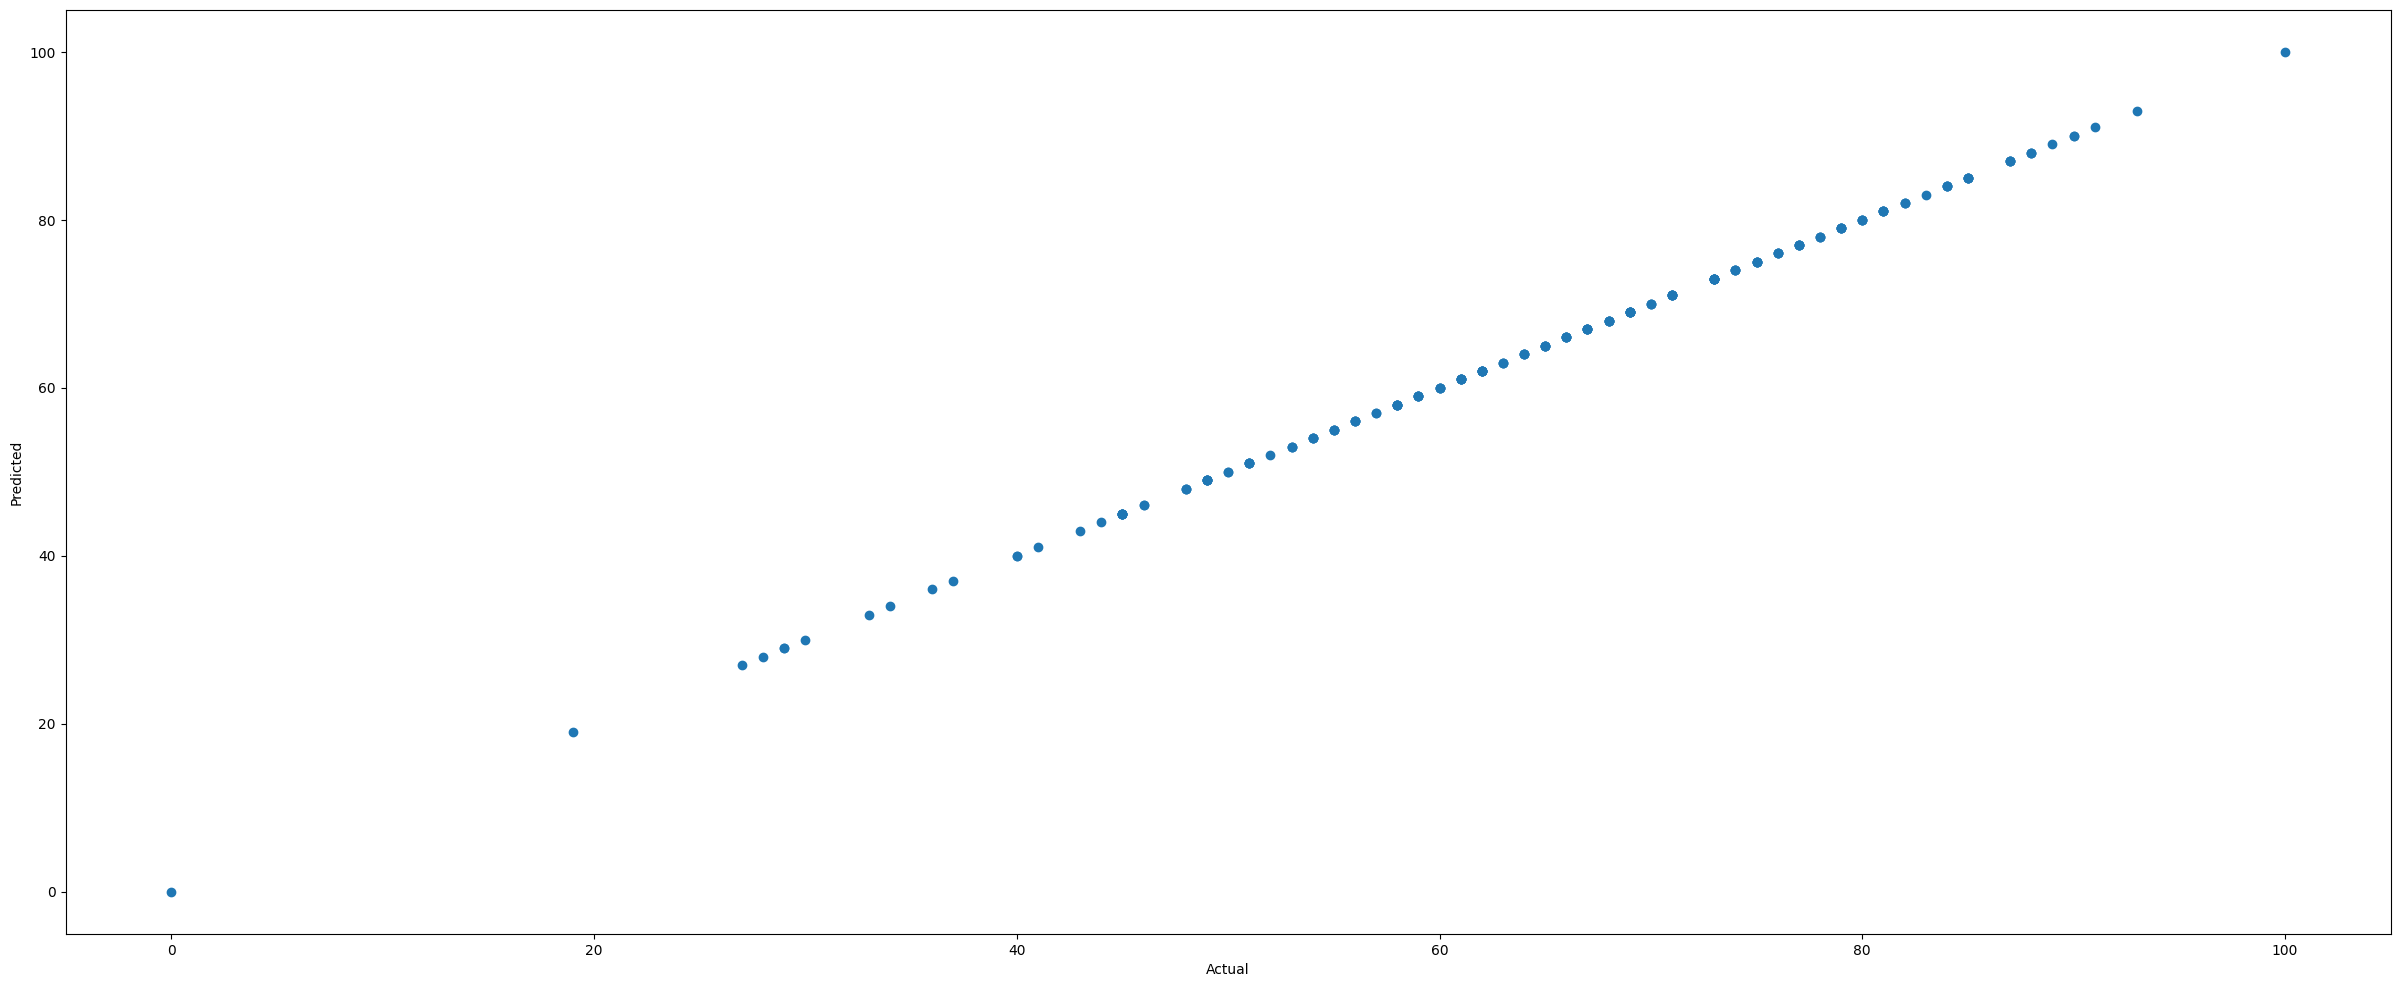

In [380]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual");
plt.ylabel("Predicted");

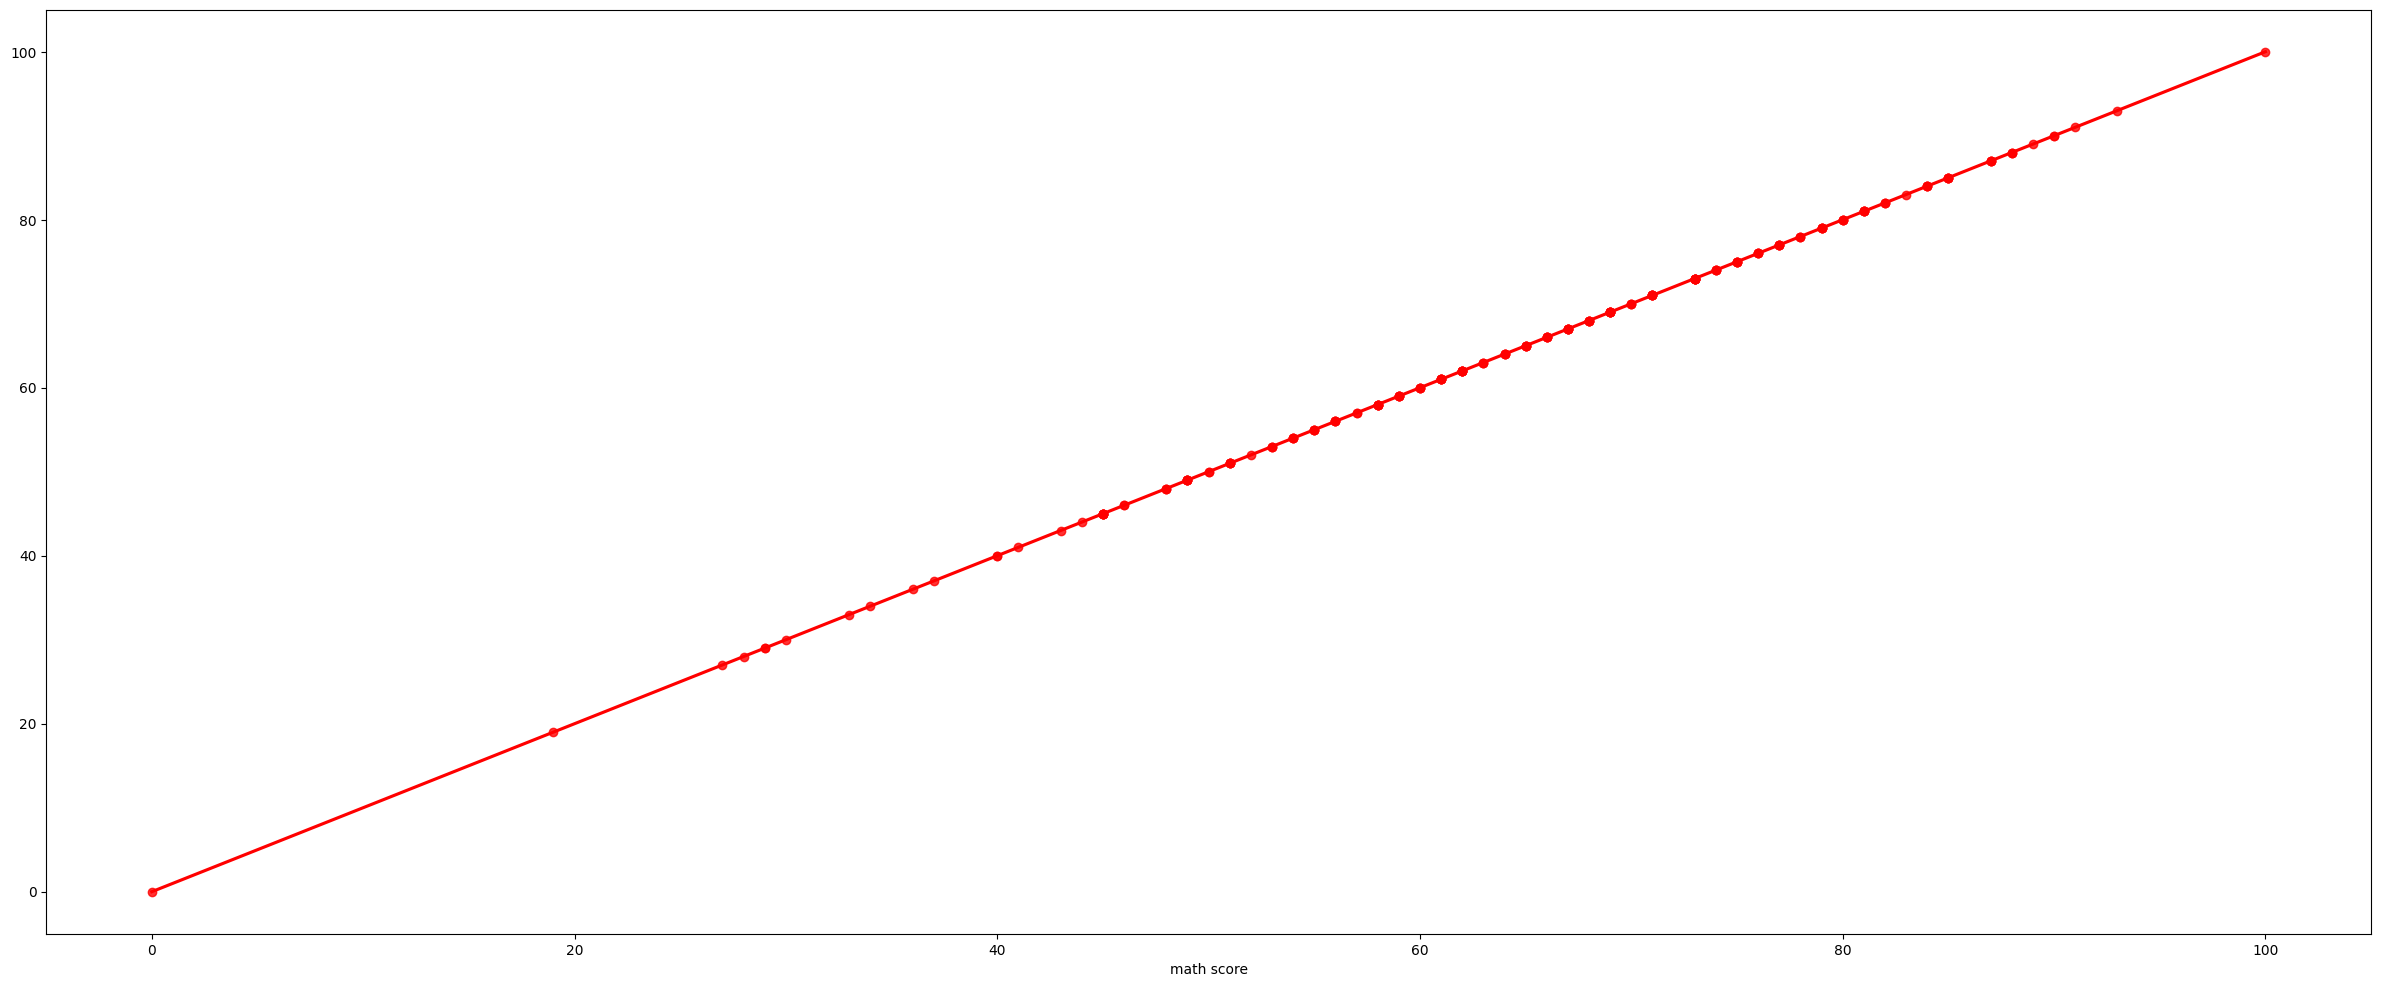

In [381]:
sns.regplot(x=y_test, y=y_pred, ci=None,color='red');

Difference between actual and predicted values

In [382]:
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted Value':y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual value,Predicted Value,Difference
521,91,91.0,-2.273737e-13
737,53,53.0,2.842171e-14
740,80,80.0,-5.684342e-14
660,74,74.0,-8.526513e-14
411,84,84.0,-1.847411e-13
...,...,...,...
408,52,52.0,2.131628e-13
332,62,62.0,1.563194e-13
208,74,74.0,-9.947598e-14
613,65,65.0,-8.526513e-14
